In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd # data processing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress deprecation and incorrect usage warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv', encoding="ISO-8859-1", low_memory=False)
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,Strawberries & CrÃ¨me (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,FrappuccinoÂ® Blended CrÃ¨me,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [3]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [7]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [8]:
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [9]:
import seaborn as sns

In [10]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'TazoÂ® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'FrappuccinoÂ® Blended Coffee',
       'FrappuccinoÂ® Light Blended Coffee',
       'FrappuccinoÂ® Blended CrÃ¨me'], dtype=object)

In [11]:
df.calories = df[['Beverage_category','Calories']]
df.calories.columns = ['DrinkMenu', 'Calories']
df.calories

,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,320
238,FrappuccinoÂ® Blended CrÃ¨me,170
239,FrappuccinoÂ® Blended CrÃ¨me,200
240,FrappuccinoÂ® Blended CrÃ¨me,180


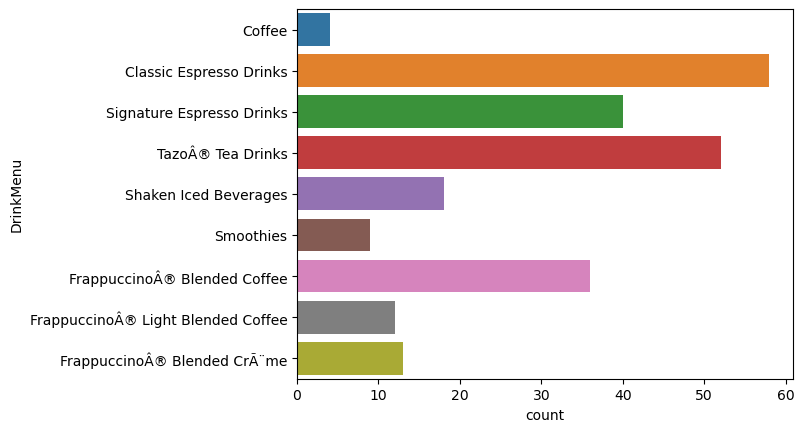

In [12]:
sns.countplot(y='DrinkMenu', data=df.calories);

In [13]:
df_beverage = pd.DataFrame(df['Beverage_category'].value_counts())
df_beverage['BeverageCategory'] = df_beverage.index
df_beverage.columns = ['NumberofDrinks', 'BeverageCategory']
df_beverage = df_beverage.reset_index().drop('index', axis=1)
df_beverage.head()

,NumberofDrinks,BeverageCategory
0,58,Classic Espresso Drinks
1,52,TazoÂ® Tea Drinks
2,40,Signature Espresso Drinks
3,36,FrappuccinoÂ® Blended Coffee
4,18,Shaken Iced Beverages


In [14]:
df.calories.sort_values("Calories", ascending=False)

,DrinkMenu,Calories
84,Signature Espresso Drinks,510
215,FrappuccinoÂ® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,TazoÂ® Tea Drinks,450
...,...,...
0,Coffee,3
105,TazoÂ® Tea Drinks,0
104,TazoÂ® Tea Drinks,0
103,TazoÂ® Tea Drinks,0


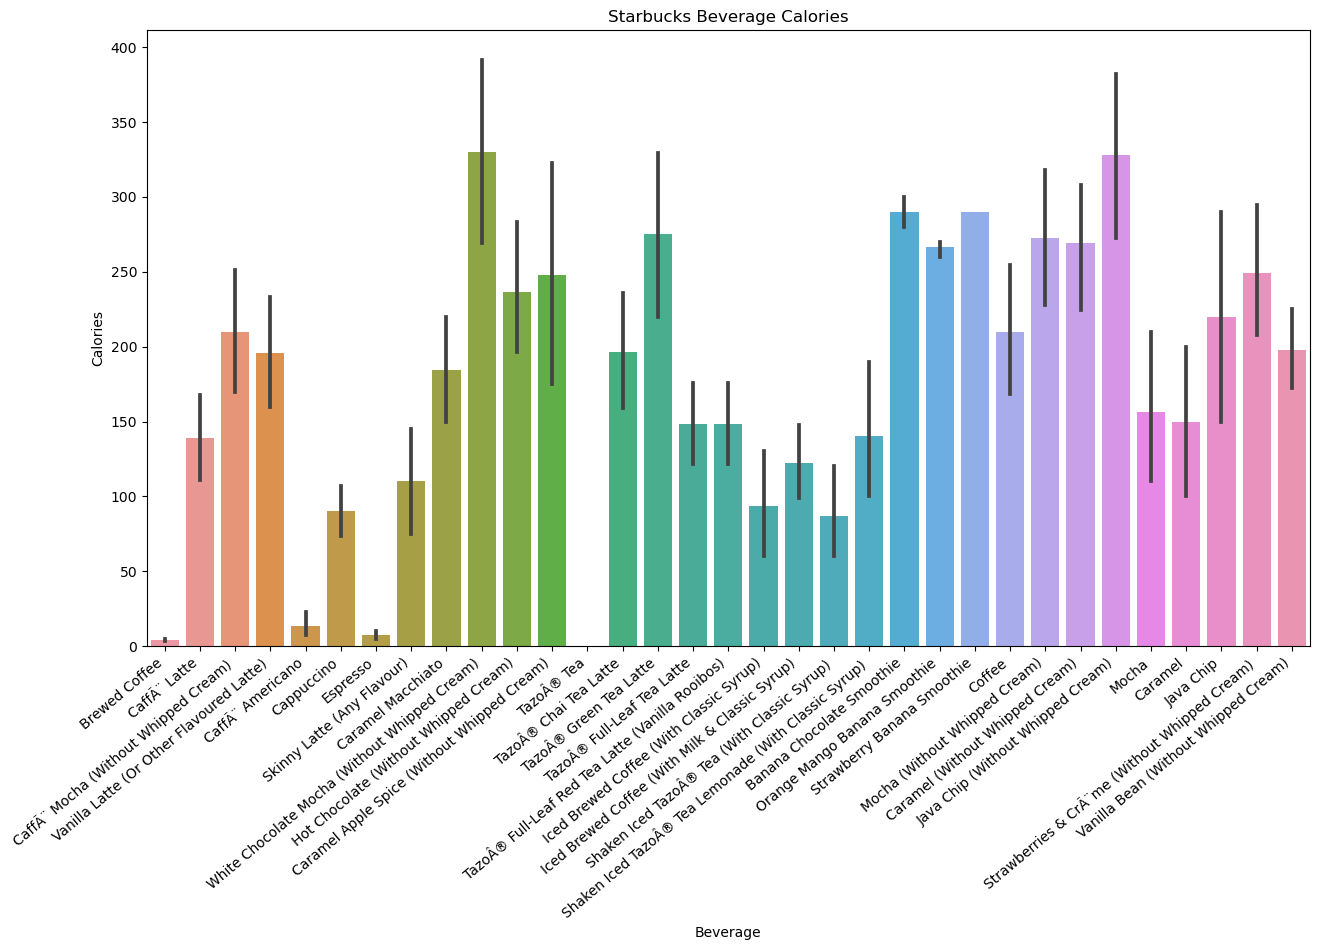

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Calories", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

In [17]:
df['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'TazoÂ® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'FrappuccinoÂ® Blended Coffee',
       'FrappuccinoÂ® Light Blended Coffee',
       'FrappuccinoÂ® Blended CrÃ¨me'], dtype=object)

In [18]:
df.calories = df[['Beverage_category','Calories']]
df.calories.columns = ['DrinkMenu','Calories']
df.calories

,DrinkMenu,Calories
0,Coffee,3
1,Coffee,4
2,Coffee,5
3,Coffee,5
4,Classic Espresso Drinks,70
...,...,...
237,FrappuccinoÂ® Blended CrÃ¨me,320
238,FrappuccinoÂ® Blended CrÃ¨me,170
239,FrappuccinoÂ® Blended CrÃ¨me,200
240,FrappuccinoÂ® Blended CrÃ¨me,180


In [19]:
df.calories.sort_values("Calories",ascending = False)

,DrinkMenu,Calories
84,Signature Espresso Drinks,510
215,FrappuccinoÂ® Blended Coffee,460
85,Signature Espresso Drinks,460
83,Signature Espresso Drinks,450
128,TazoÂ® Tea Drinks,450
...,...,...
0,Coffee,3
105,TazoÂ® Tea Drinks,0
104,TazoÂ® Tea Drinks,0
103,TazoÂ® Tea Drinks,0


In [18]:
classic = df.loc[(df['Beverage_category'] == 'Classic Espresso Drinks')]
classic.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
4,Classic Espresso Drinks,CaffÃ¨ Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,CaffÃ¨ Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75
6,Classic Espresso Drinks,CaffÃ¨ Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
7,Classic Espresso Drinks,CaffÃ¨ Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15%,0%,30%,0%,75
8,Classic Espresso Drinks,CaffÃ¨ Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15%,0%,30%,0%,75


Text(0.5, 1.0, 'Starbucks classic drink calories')

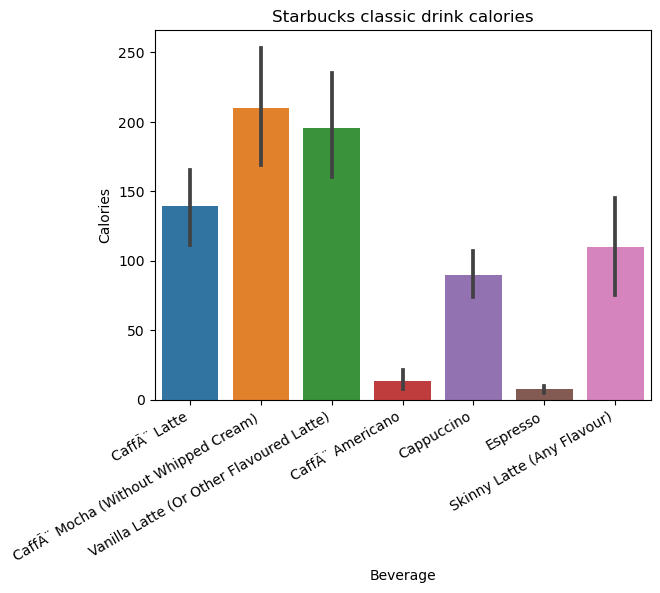

In [20]:
sns.barplot(x="Beverage",y = "Calories",data = classic)
plt.xticks(rotation=30, ha = 'right')
plt.title("Starbucks classic drink calories")

In [28]:
df.sort_values(" Sugars (g)", ascending=False)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,FrappuccinoÂ® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
206,FrappuccinoÂ® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Classic Espresso Drinks,Espresso,Solo,5,0,0.0,0.0,0,0,1,0,0,0.4,0%,0%,0%,0%,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0,0.0,0.0,0,1,2,0,0,1.0,0%,0%,0%,0%,150
102,TazoÂ® Tea Drinks,TazoÂ® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,TazoÂ® Tea Drinks,TazoÂ® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


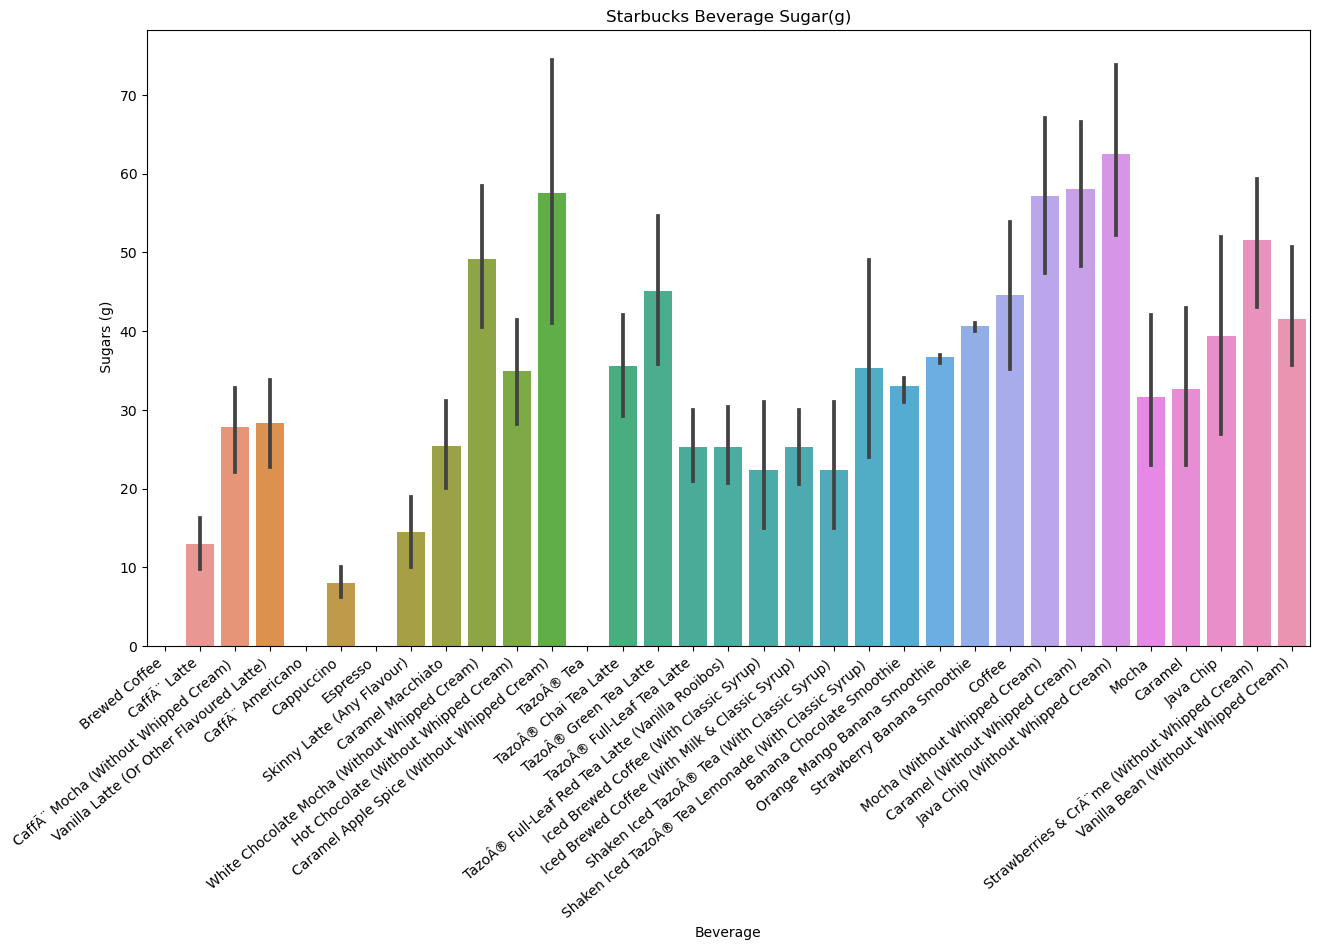

In [33]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y=" Sugars (g)", data=df)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

In [34]:
signature = df.loc[(df['Beverage_category'] == 'Signature Espresso Drinks')]
signature.tail()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
97,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,330,9,2.5,0.0,0,160,55,4,44,15.0,15%,0%,50%,50%,30
98,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,140,0,0.0,0.0,0,10,35,0,33,0.0,0%,0%,0%,0%,0
99,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Tall,210,0,0.0,0.0,0,15,53,0,49,0.0,0%,0%,0%,0%,0
100,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Grande,280,0,0.0,0.0,0,20,70,0,65,0.0,0%,0%,0%,0%,0
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0


Text(0.5, 1.0, 'Starbucks Signature Espresso Drinks Sugars(g)')

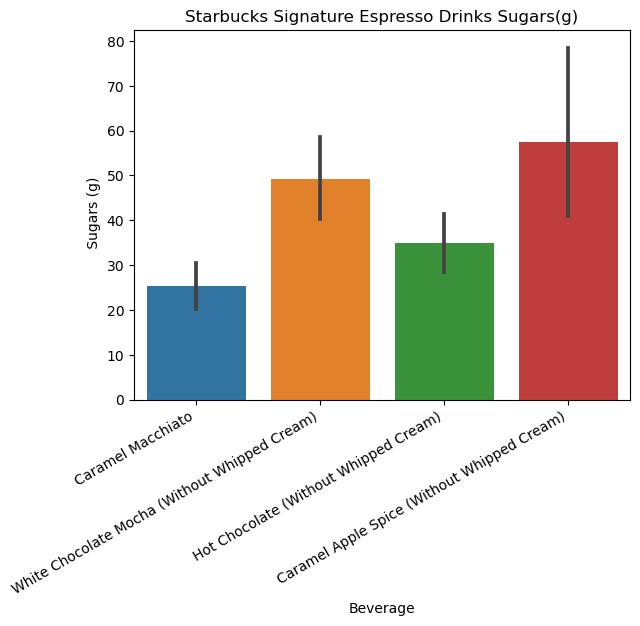

In [35]:
sns.barplot(x='Beverage', y=' Sugars (g)', data=signature)
plt.xticks(rotation=30, ha='right')
plt.title("Starbucks Signature Espresso Drinks Sugars(g)")

In [36]:
tea = df.loc[(df['Beverage_category'] == 'TazoÂ® Tea Drinks')]
tea.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,TazoÂ® Tea Drinks,TazoÂ® Tea,Short,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,TazoÂ® Tea Drinks,TazoÂ® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,TazoÂ® Tea Drinks,TazoÂ® Tea,Grande,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,TazoÂ® Tea Drinks,TazoÂ® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
106,TazoÂ® Tea Drinks,TazoÂ® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6%,0%,10%,0%,50


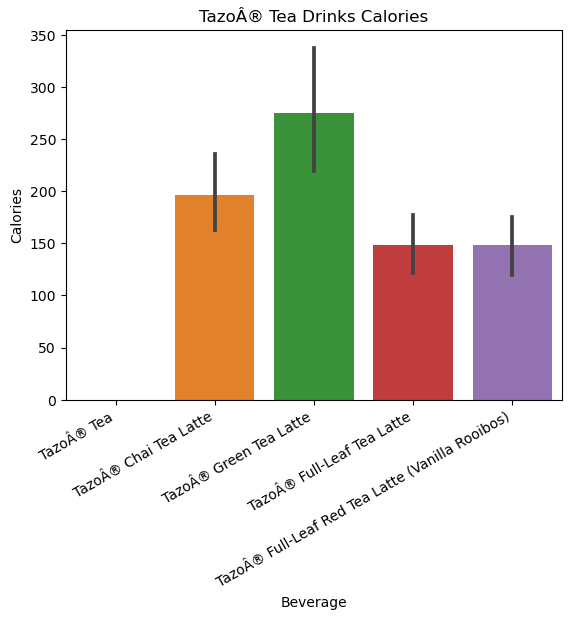

In [37]:
sns.barplot(x='Beverage', y= 'Calories', data=tea)
plt.xticks(rotation=30, ha='right')
plt.title("TazoÂ® Tea Drinks Calories")
plt.show()

Text(0.5, 1.0, 'Signature Espresso Drinks')

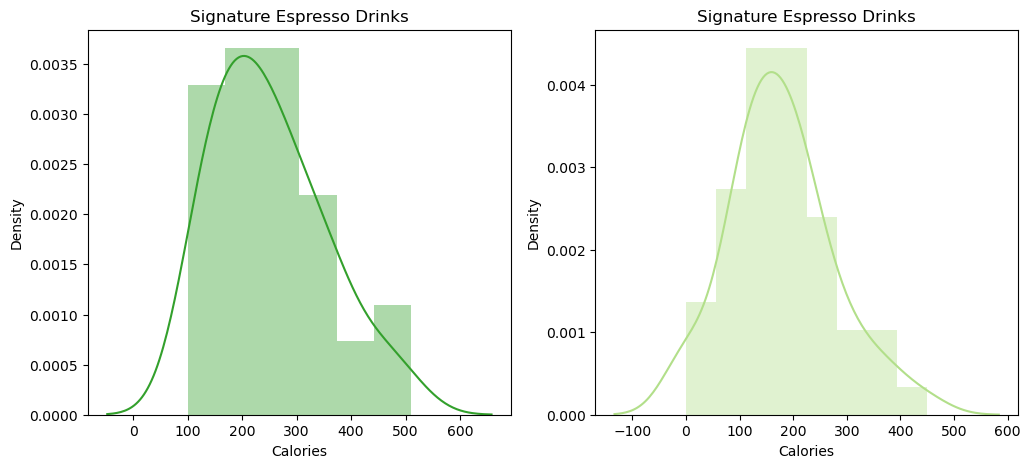

In [38]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(df['Calories'].loc[df['Beverage_category'] == 'Signature Espresso Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[3], ax=ax1)
ax1.set_title('Signature Espresso Drinks')

figure.set_size_inches(12,5)
sns.distplot(df['Calories'].loc[df['Beverage_category'] == 'TazoÂ® Tea Drinks'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[2], ax=ax2)
ax2.set_title('Signature Espresso Drinks')

In [39]:
df.groupby('Beverage_prep').count()


,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_prep,,,,,,,,,,,,,,,,,
2% Milk,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,49
Doppio,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Grande,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Grande Nonfat Milk,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
Short,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Short Nonfat Milk,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Solo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Soymilk,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Tall,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


Text(0, 0.5, 'Count')

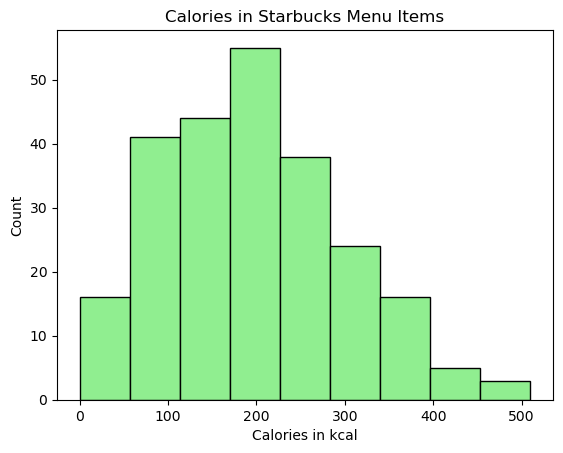

In [40]:
calories = df["Calories"]
plt.hist(calories, bins=9, edgecolor = "black", color = "lightgreen")
plt.title("Calories in Starbucks Menu Items")
plt.xlabel("Calories in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

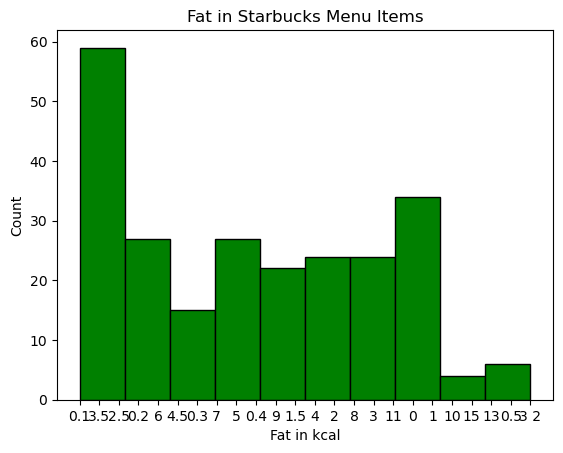

In [4]:
fat = df[" Total Fat (g)"]
plt.hist(fat, bins=10, edgecolor = "black", color = "green")
plt.title("Fat in Starbucks Menu Items")
plt.xlabel("Fat in kcal")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

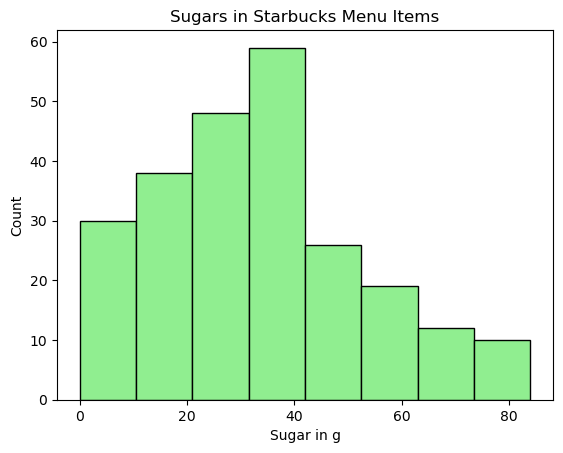

In [5]:
fat = df[" Sugars (g)"]
plt.hist(fat, bins=8, edgecolor = "black", color = "lightgreen")
plt.title("Sugars in Starbucks Menu Items")
plt.xlabel("Sugar in g")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

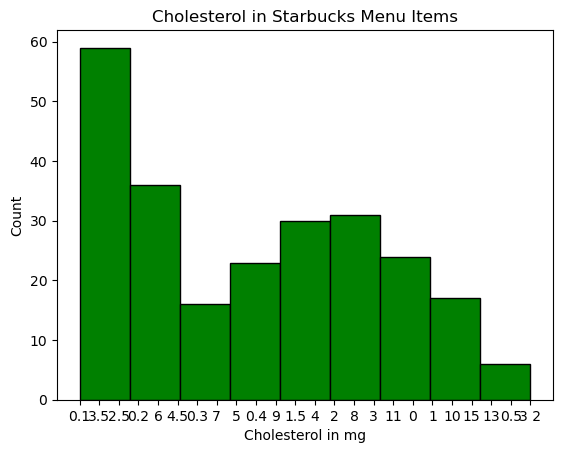

In [43]:
fat = df[" Total Fat (g)"]
plt.hist(fat, bins=9, edgecolor = "black", color = "green")
plt.title("Cholesterol in Starbucks Menu Items") # add a title
plt.xlabel("Cholesterol in mg")
plt.ylabel("Count")

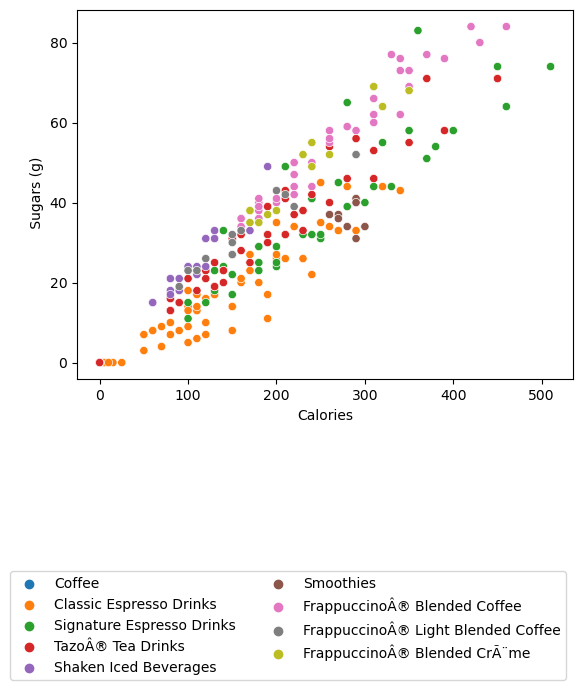

In [47]:
sns.scatterplot(data=df, x="Calories", y=" Sugars (g)", hue="Beverage_category")
plt.legend(loc="best", bbox_to_anchor=(1, -0.5), ncol= 2);

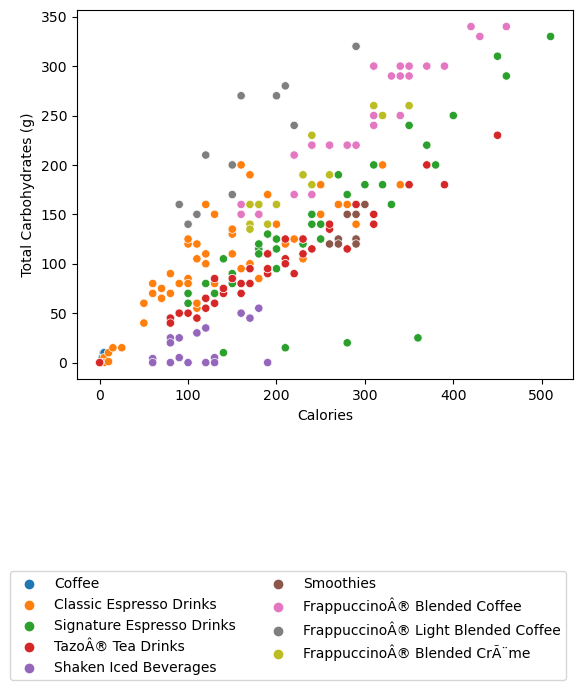

In [12]:
sns.scatterplot(data=df, x="Calories", y=" Total Carbohydrates (g) ",hue="Beverage_category")
plt.legend(loc="best", bbox_to_anchor=(1, -0.5), ncol= 2)
plt.show()

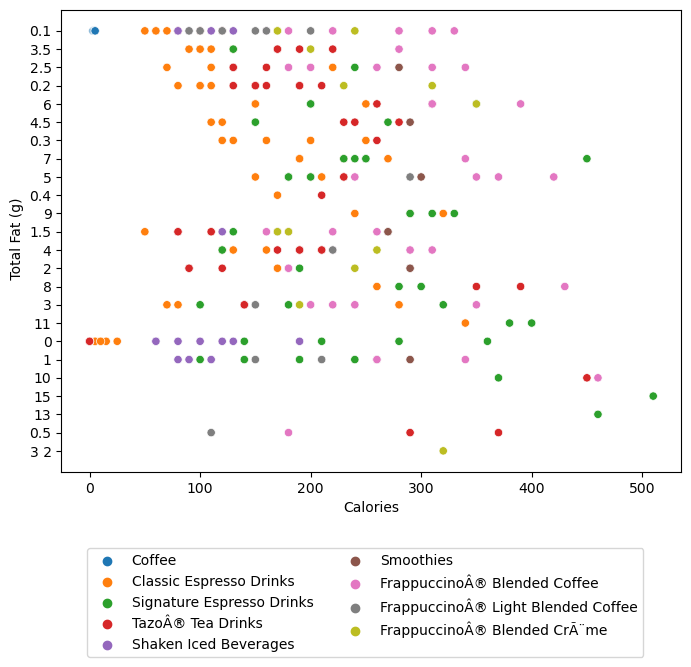

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Calories", y=" Total Fat (g)", hue="Beverage_category")
plt.legend(loc="best", bbox_to_anchor=(0.95, -0.15), ncol= 2)
plt.show()

<AxesSubplot:xlabel='Calories', ylabel=' Total Fat (g)'>

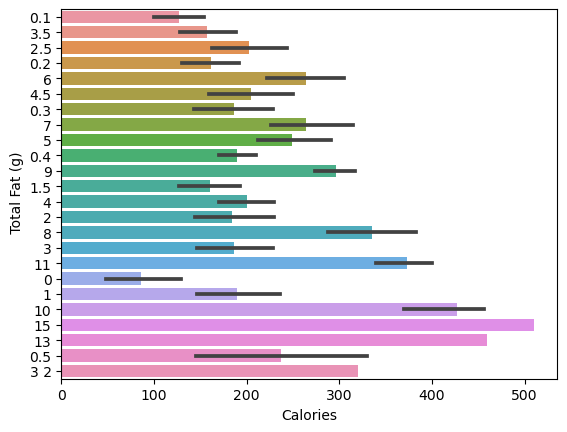

In [51]:
sns.barplot(data=df, x="Calories", y=" Total Fat (g)")


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

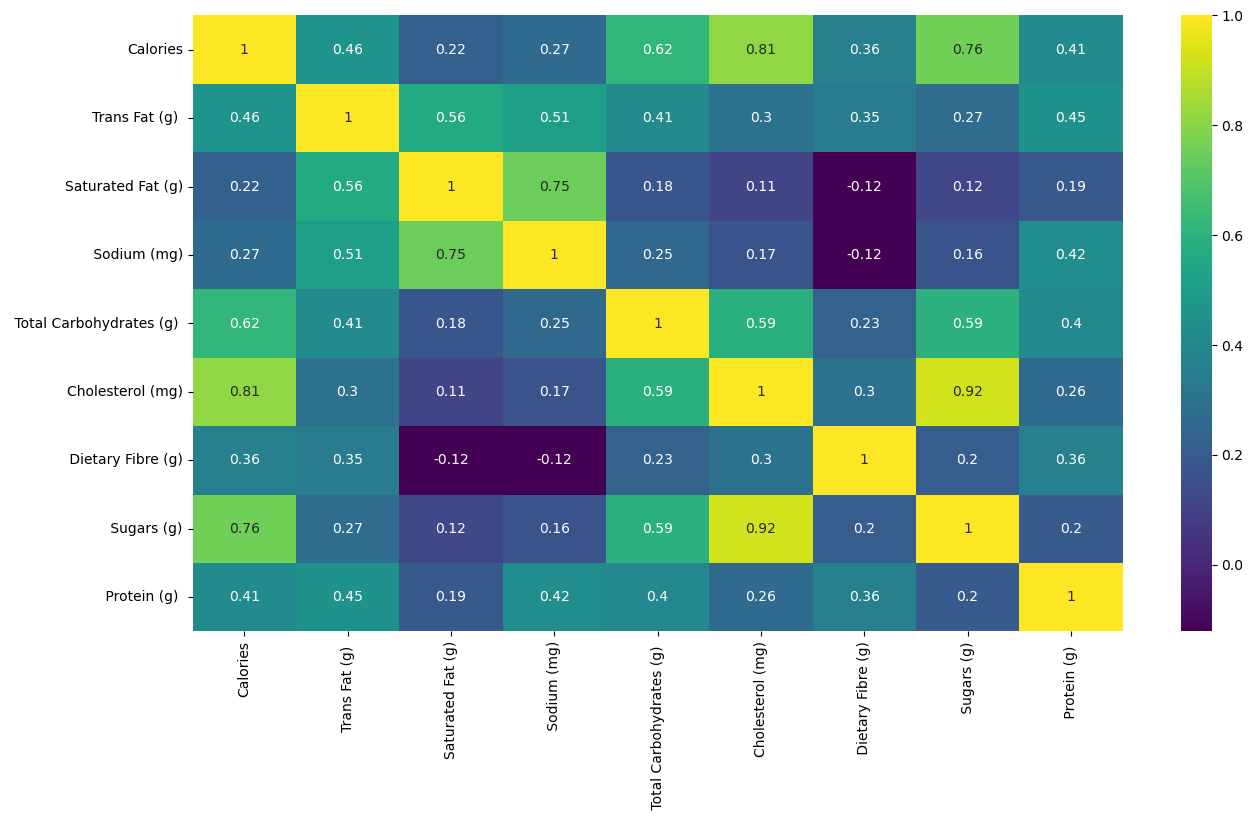

In [15]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="viridis")
df.columns